In [162]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib .pyplot as plt
from matplotlib import style
from sklearn.linear_model import LinearRegression

In [163]:
os.getcwd() #check work directory

'C:\\Users\\user\\Desktop\\JKT'

In [164]:
 os.chdir("C:\\Users\\user\\Desktop\\JKT")# change directory

In [165]:
df=pd.read_csv("insurance.csv")

In [166]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [167]:
df.shape

(1338, 7)

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [169]:
df.isnull().sum() #check for null values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [170]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [171]:
df.describe() #statistical information of the numerical data

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


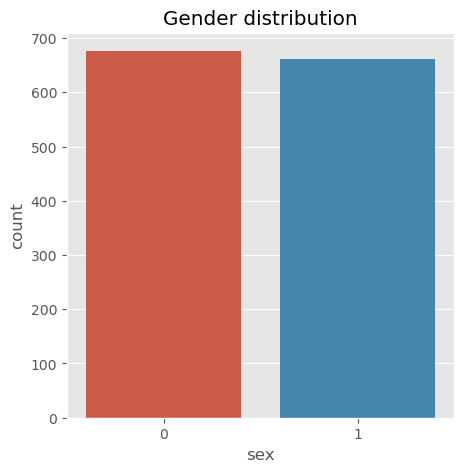

In [204]:
plt.figure(figsize=(5,5))
style.use("ggplot")
sns.countplot(x='sex', data=df)
plt.title('Gender distribution')
plt.show()

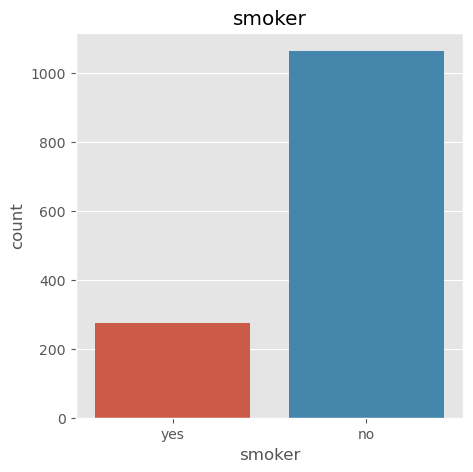

In [173]:
plt.figure(figsize=(5,5))
sns.countplot(x='smoker', data=df)
plt.title('smoker')
plt.show()

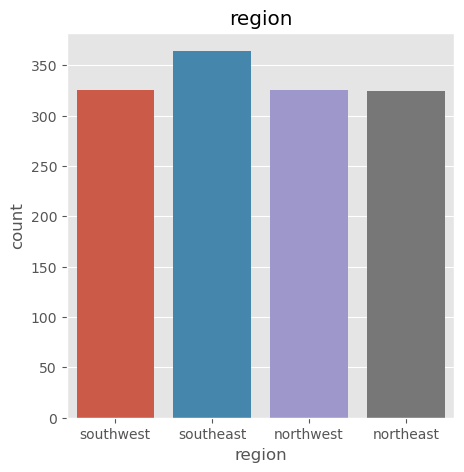

In [174]:
plt.figure(figsize=(5,5))
sns.countplot(x='region', data=df)
plt.title('region')
plt.show()

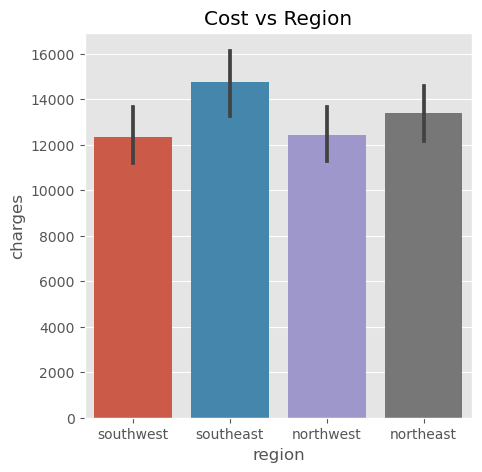

In [175]:
plt.figure(figsize=(5,5))
sns.barplot(x='region',y='charges', data=df)
plt.title('Cost vs Region')
plt.show()

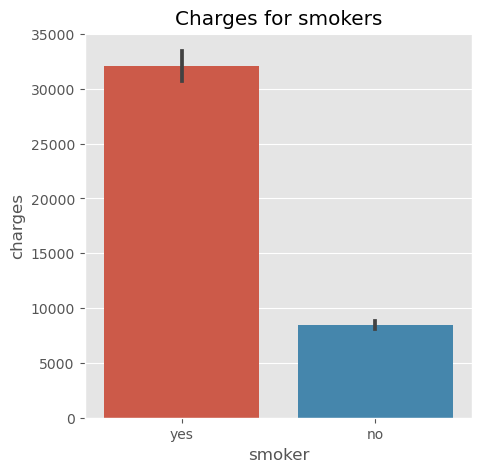

In [176]:
plt.figure(figsize=(5,5)) #Charges for smokers and non-smokers
sns.barplot(x='smoker',y='charges', data=df)
plt.title('Charges for smokers')
plt.show()

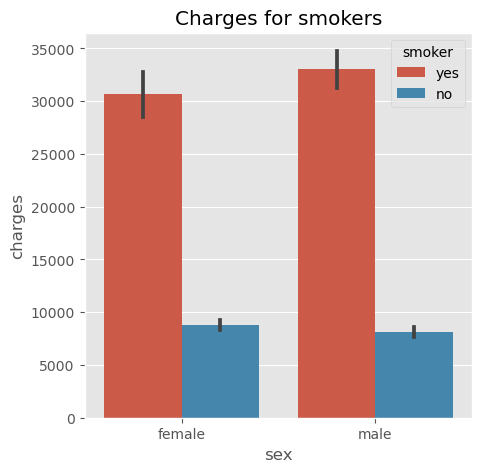

In [177]:
plt.figure(figsize=(5,5))
sns.barplot(x='sex',y='charges',hue='smoker', data=df)
plt.title('Charges for smokers')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

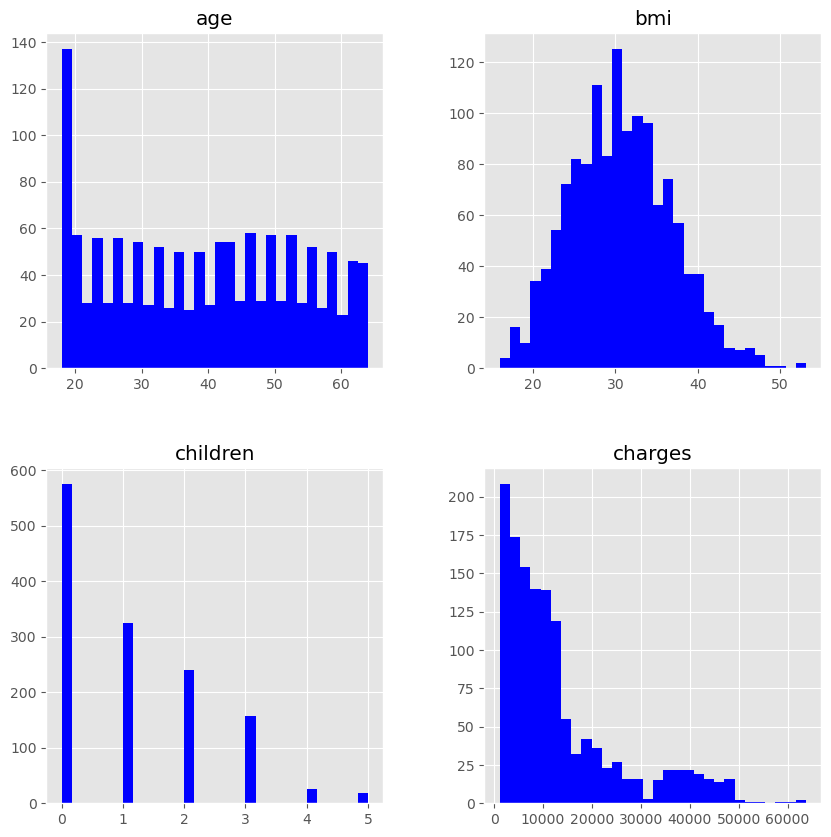

In [178]:
df[['age','bmi','children','charges']].hist(bins=30, figsize=(10,10) ,color='blue')
plt.show

In [179]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [181]:
#Converting categorical values into numerical values( Here, we've converted strings into integers)
df['sex'] = df['sex'].apply({'male':0, 'female':1}.get)
df['smoker'] = df['smoker'].apply({'yes':1, 'no':0}.get)
df['region'] = df['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

In [182]:
#Updated data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


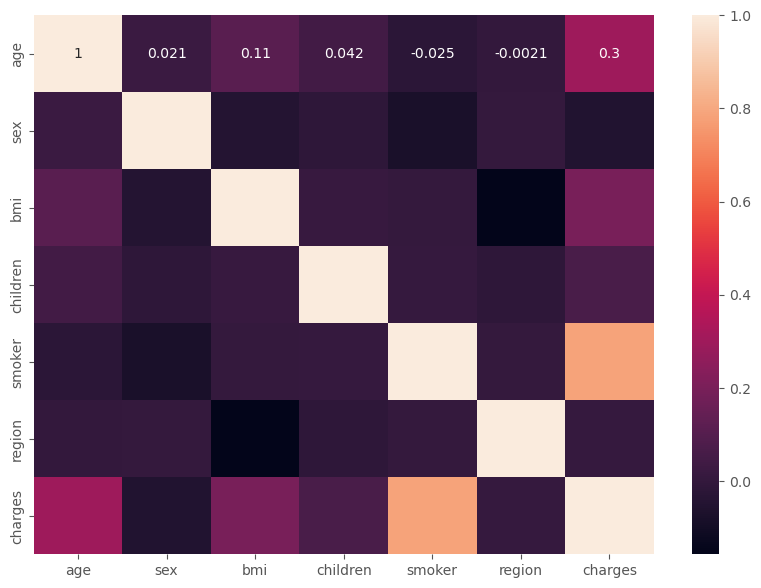

In [206]:
#Correlation between different attributes
plt.figure(figsize=(10,7))# the lighter the shade the higher the correlation
sns.heatmap(df.corr(), annot = True)
plt.show()

In [184]:
X = df.drop(['charges', 'sex'], axis=1)
#drop charges and sex columns as they have low correlation
#axis =1 to indicate that we are removing the column
y = df.charges

In [186]:
#splitting the data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)#test size is 30%
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (936, 5)
X_test shape:  (402, 5)
y_train shape:  (936,)
y_test shape:  (402,)


In [190]:
#Above is the shape of the training and testing data
linreg = LinearRegression()

In [195]:

#Fit training data on the LRM
linreg.fit(X_train, y_train)
pred= linreg.predict(X_test)

In [196]:
from sklearn.metrics import r2_score

In [197]:
#To see how well a model fits the data, use r2 score
print("R2 score: ",(r2_score(y_test, pred)))

R2 score:  0.7697211527941855


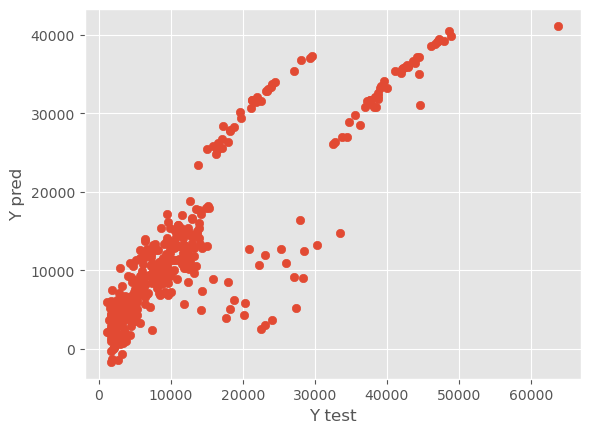

In [198]:
#Plot to show how well a model predicts
plt.scatter(y_test, pred)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

In [201]:
#Predict insurance cost for a new customer (used sample data)
data = {'age':50, 'bmi':25, 'children':2, 'smoker':0, 'region':2}
index = [0]
cust_df = pd.DataFrame(data, index)
cust_df

,age,bmi,children,smoker,region
0,50,25,2,0,2


In [202]:
cost_pred = linreg.predict(cust_df)
print("The medical insurance cost of the new customer is: ", cost_pred)

The medical insurance cost of the new customer is:  [9579.86504857]
